In [46]:
def robotInit():
  return {
      "x": 0,
      "y": 0,
      "theta": 0,
      "v": 1,
      "w": 0,
  }

dt = 0.1

In [47]:
from matplotlib import pyplot as plt

def robotPlot(robots):
  plt.figure(figsize=(16, 16))
  robotsx = [r["x"] for r in robots]
  robotsy = [r["y"] for r in robots]
  #plt.figure(figsize=(16, 16));
  plt.plot(robotsx, robotsy, 'o')

In [48]:
from math import cos, sin, sqrt

t = 0
SENSOR_LEN = 2
CIRCLE_RADIUS = 10

def robotMove(robot, dt):
  global t
  global SENSOR_LEN
  global CIRCLE_RADIUS
  t += dt

  robot["x"] += cos(robot["theta"]) * robot["v"] * dt
  robot["y"] += sin(robot["theta"]) * robot["v"] * dt

  sensorPos = (robot["x"] + cos(robot["theta"]) * SENSOR_LEN, robot["y"] + sin(robot["theta"]) * SENSOR_LEN)
  distToCenter = sqrt(sensorPos[0] ** 2 + sensorPos[1] ** 2)
  distToWall = abs(distToCenter - CIRCLE_RADIUS)
  if distToCenter >= CIRCLE_RADIUS:
    robot["w"] += 0.1 / distToWall
  else:
    robot["w"] = 0
  robot["theta"] += robot["w"] * dt

  return robot

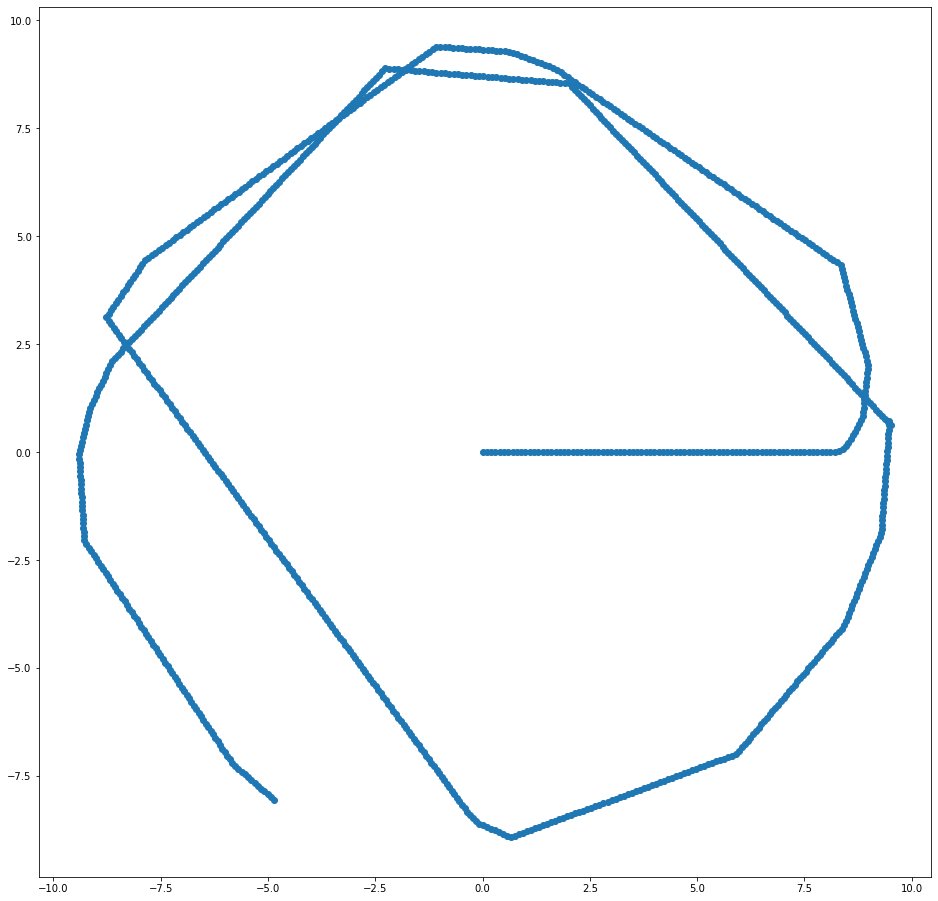

In [49]:
robot = robotInit()

robots = [robot]
for i in range(1000):
  robot = robotMove(robot.copy(), dt)
  robots.append(robot)

robotPlot(robots)